The required packges:

In [ ]:
import h5py
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.python.framework.ops import EagerTensor
from tensorflow.python.ops.resource_variable_ops import ResourceVariable
import time

Keras is an API that simplifies the process of building and training neural network models. It's not a standalone library in the traditional sense. Instead, it's a higher-level abstraction that sits on top of other deep learning frameworks like TensorFlow, Theano, and CNTK. Keras provides a unified interface to these frameworks, making it easier for users to create and experiment with neural networks without having to worry about low-level details.

In the past, Keras was a separate library that could use different backends like TensorFlow or Theano. However, with TensorFlow 2.0 and later versions, Keras has become a core part of TensorFlow. This means that when you import tensorflow.keras, you're actually using the integrated version of Keras within TensorFlow.

h5py is a Python library used for interacting with HDF5 (Hierarchical Data Format version 5) files. HDF5 is a versatile and widely used file format for storing and managing large and complex datasets. It's particularly popular in scientific computing, data analysis, and machine learning due to its ability to store large amounts of data and metadata in a hierarchical structure, along with features like compression and efficient data access.

h5py provides a high-level interface to work with HDF5 files in Python. It allows you to create, read, write, and manipulate datasets, attributes, and groups within HDF5 files. Some common use cases of h5py include:

Storing Large Datasets: HDF5 files are well-suited for storing large datasets that don't fit entirely in memory. h5py allows you to create and manage these datasets efficiently.

Hierarchical Structure: HDF5 files have a hierarchical structure similar to that of a filesystem. You can create groups to organize your data and datasets within those groups. h5py provides functions to create and navigate through this hierarchy.

Attributes: You can attach metadata to datasets and groups using attributes. This is useful for storing information about the data, such as units, descriptions, or any other relevant information.

Compression: HDF5 supports data compression, which can significantly reduce the file size when dealing with large datasets. h5py allows you to apply various compression algorithms to your datasets.

Parallel I/O: HDF5 supports parallel I/O, which is beneficial for efficiently reading and writing data in parallel from multiple processes. h5py provides features to take advantage of parallel I/O capabilities.

Integration with Scientific Libraries: Many scientific libraries, such as NumPy, work well with h5py. You can directly read and write NumPy arrays to HDF5 datasets using h5py.

Machine Learning Applications: h5py is commonly used in machine learning for storing large datasets used for training and evaluation. It's especially useful when working with deep learning models that require a lot of data.

Here's a simple example of how h5py might be used to create an HDF5 file, store data, and read it back

In [ ]:
import h5py

# Create an HDF5 file
with h5py.File('data.h5', 'w') as f:
    # Create a dataset
    data = f.create_dataset('my_dataset', data=[1, 2, 3, 4, 5])

# Read the data from the HDF5 file
with h5py.File('data.h5', 'r') as f:
    dataset = f['my_dataset']
    print(dataset[:])  # Output: [1 2 3 4 5]


[1 2 3 4 5]


- File: my_data.h5
    - Group: sensors
        - Dataset: temperature
        - Dataset: pressure
    - Group: images
        - Dataset: image1
        - Dataset: image2
    - Dataset: metadata
    
In this example, the HDF5 file "my_data.h5" contains two main groups: "sensors" and "images". The "sensors" group has two datasets ("temperature" and "pressure"), while the "images" group contains two datasets ("image1" and "image2"). Additionally, there's a top-level dataset called "metadata" that's not contained within any group.

h5py provides functions to create groups, datasets, and attributes within an HDF5 file, and also to navigate through this hierarchical structure. For instance, you can use create_group() to create a new group, create_dataset() to create a dataset, and use indexing and slicing to access data within datasets. You can also use functions like visit() to traverse the hierarchy and perform actions on groups and datasets recursively.

Checking our version of tf

In [ ]:
tf.__version__

'2.12.0'

 Basically, all you need to do is implement forward propagation through a computational graph. TensorFlow will compute the derivatives for you, by moving backwards through the graph recorded with GradientTape. All that's left for you to do then is specify the cost function and optimizer you want to use!

 tf.Tensor. These tensors are the TensorFlow equivalent of Numpy arrays, i.e. multidimensional arrays of a given data type that also contain information about the computational graph.

 you'll use tf.Variable to store the state of your variables. Variables can only be created once as its initial value defines the variable shape and type. Additionally, the dtype arg in tf.Variable can be set to allow data to be converted to that type. But if none is specified, either the datatype will be kept if the initial value is a Tensor, or convert_to_tensor will decide. It's generally best for you to specify directly, so nothing breaks

In [ ]:
train_dataset = h5py.File('datasets/train_signs.h5', "r")
test_dataset = h5py.File('datasets/test_signs.h5', "r")

In [ ]:
x_train = tf.data.Dataset.from_tensor_slices(train_dataset['train_set_x'])
y_train = tf.data.Dataset.from_tensor_slices(train_dataset['train_set_y'])
#This line attempts to create a TensorFlow dataset (x_test) from a specific dataset named 'test_set_x' stored within the test_dataset HDF5 file
#This line is actually like when we try to read from lists and when we have some nested lists and we want to directly read from the inner one
x_test = tf.data.Dataset.from_tensor_slices(test_dataset['test_set_x'])
y_test = tf.data.Dataset.from_tensor_slices(test_dataset['test_set_y'])
#tf.data.Dataset.from_tensor_slices() expects its argument to be a TensorFlow tensor or a NumPy array

Since TensorFlow Datasets are generators, you can't access directly the contents unless you iterate over them in a for loop, or by explicitly creating a Python iterator using iter and consuming its elements using next

In [ ]:
print(x_train.element_spec)

In [ ]:
print(next(iter(x_train)))

In [ ]:
unique_labels = set()  # Initialize an empty set to store unique labels
for element in y_train:  # Iterate through each element in the dataset
    unique_labels.add(element.numpy())  # Add the label to the set

print(unique_labels)  # Print the set of unique labels


used to iterate through a TensorFlow dataset ( containing labels) and collect the unique labels present in that dataset.

In [ ]:
images_iter = iter(x_train)  # Create an iterator for the images dataset
labels_iter = iter(y_train)  # Create an iterator for the labels dataset
plt.figure(figsize=(10, 10))  # Create a matplotlib figure

for i in range(25):  # Loop to visualize a certain number of images
    ax = plt.subplot(5, 5, i + 1)  # Create a subplot for each image
    plt.imshow(next(images_iter).numpy().astype("uint8"))  # Display the next image
    plt.title(next(labels_iter).numpy().astype("uint8"))  # Display the next label
    plt.axis("off")  # Turn off axes for cleaner visualization


 one more additional difference between TensorFlow datasets and Numpy arrays: If you need to transform one, you would invoke the map method to apply the function passed as an argument to each of the elements.

In [ ]:
def normalize(image):
    """
    Transform an image into a tensor of shape (64 * 64 * 3, )
    and normalize its components.

    Arguments
    image - Tensor.

    Returns:
    result -- Transformed tensor
    """
    image = tf.cast(image, tf.float32) / 255.0
    image = tf.reshape(image, [-1,])
    return image

In [ ]:
new_train = x_train.map(normalize)
new_test = x_test.map(normalize)

In [ ]:
new_train.element_spec

In [ ]:
print(next(iter(new_train)))

**tf.constant**: A constant in TensorFlow is an immutable tensor whose value cannot be changed after it's created. Once you define a constant using tf.constant, its value remains fixed throughout the computation.

**tf.Variable:** A variable in TensorFlow is a mutable tensor that can change its value. Variables are typically used to represent model parameters that are updated during the training process. You can update the value of a variable using its assign method. For example:

The name parameter in TensorFlow is used to provide a human-readable name to a tensor or variable. This name is primarily intended for debugging and visualization purposes. When you visualize or inspect a TensorFlow graph or model, having meaningful names assigned to tensors and variables can help you understand the structure of the computation graph more easily.

In [ ]:
# GRADED FUNCTION: linear_function

def linear_function():
    """
    Implements a linear function:
            Initializes X to be a random tensor of shape (3,1)
            Initializes W to be a random tensor of shape (4,3)
            Initializes b to be a random tensor of shape (4,1)
    Returns:
    result -- Y = WX + b
    """

    np.random.seed(1)

    """
    Note, to ensure that the "random" numbers generated match the expected results,
    please create the variables in the order given in the starting code below.
    (Do not re-arrange the order).
    """
    # (approx. 4 lines)
    # X = ...
    # W = ...
    # b = ...
    # Y = ...
    X = tf.constant(np.random.randn(3, 1), name="X")
    W = tf.constant(np.random.randn(4, 3), name="W")
    b = tf.constant(np.random.randn(4, 1), name="b")

    # Compute the linear function Y = WX + b
    Y = tf.add(tf.matmul(W, X), b)

    # YOUR CODE ENDS HERE
    return Y

Tensors can be thought of as multi-dimensional arrays with a uniform data type, similar to NumPy arrays but with additional capabilities for efficient computation on GPUs and other hardware accelerators.


1.   Multidimensional Arrays: Tensors can have zero or more dimensions. A 0-dimensional tensor is a scalar (like a single number), a 1-dimensional tensor is a vector, a 2-dimensional tensor is a matrix, and so on.
2.   Data Type: Each element of a tensor has the same data type, such as float32, int64, etc. This allows for efficient and consistent operations on tensors.

1.  Operations: Tensors support various mathematical and tensor-specific operations, like addition, multiplication, dot product, reshaping, etc. These operations are optimized for high-performance computation, often leveraging GPU acceleration.






The keras.activations module contains a range of activation functions that you can use when defining your neural network architectures. These functions are typically applied to the output of a layer using either the Keras functional API or the Sequential API.


1.  keras.activations.relu(x): Rectified Linear Unit (ReLU) activation function. It sets all negative values in the input to zero and leaves positive values unchanged.

1.   keras.activations.sigmoid(x): Sigmoid activation function. It squashes the input values between 0 and 1, resulting in an S-shaped curve.

1.   keras.activations.tanh(x): Hyperbolic tangent activation function. It squashes the input values between -1 and 1, similar to the sigmoid but centered at zero.
2.  
keras.activations.softmax(x): Softmax activation function. It's used in multi-class classification problems to convert raw scores into probability distribution over classes.

1.   keras.activations.linear(x): Linear activation function. It simply returns the input unchanged. It's typically used in regression problems or when no non-linearity is desired.






In [ ]:
import tensorflow as tf

def sigmoid(z):
    """
    Computes the sigmoid of z

    Arguments:
    z -- input value, scalar or vector

    Returns:
    a -- (tf.float32) the sigmoid of z
    """

    # Cast z to type float32 using tf.cast
    z = tf.cast(z, tf.float32)
    #Casting z to float32 is necessary because the tf.keras.activations.
    #sigmoid function requires its input to be of type float16, float32, float64, complex64, or complex128.
    #In this case, float32 is being used to ensure compatibility with the required input type.

    # Compute the sigmoid using tf.keras.activations.sigmoid
    a = tf.keras.activations.sigmoid(z)

    return a


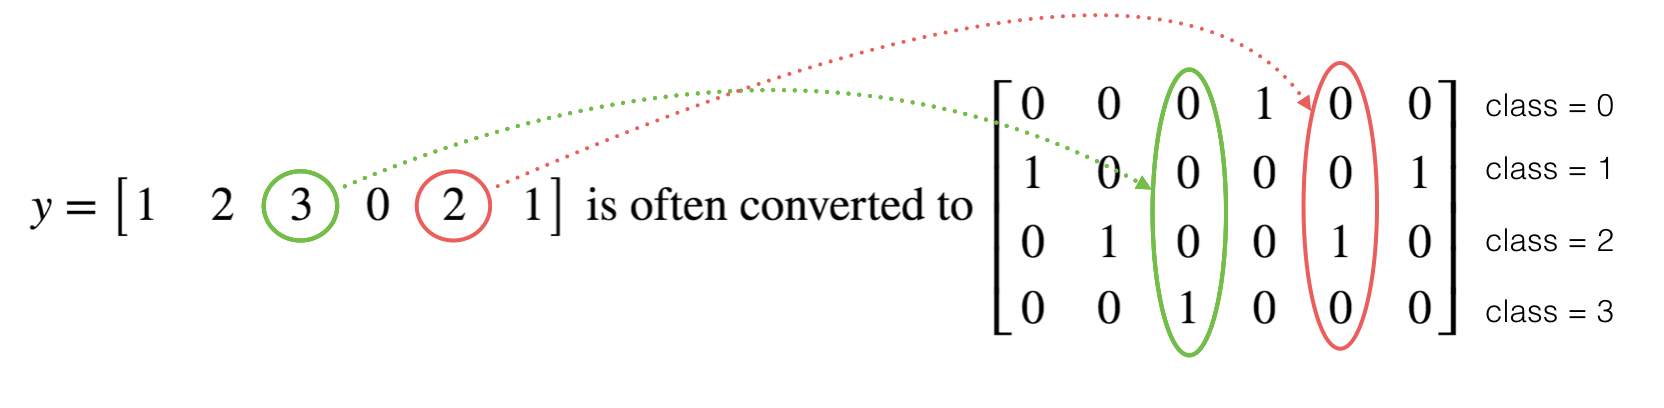

in deep learning you will have a  𝑌
  vector with numbers ranging from  0
  to  𝐶−1
 , where  𝐶
  is the number of classes. If  𝐶
  is for example 4, then you might have the following y vector which you will need to convert like this:

axis=0 indicates the new axis is created at dimension 0

For example, if you have a label label = 2 and you're creating a one-hot encoding with depth = 5, and you set axis=0, it means that the one-hot encoding will be represented as a column vector with shape (5, 1):\

In [ ]:
# GRADED FUNCTION: one_hot_matrix
def one_hot_matrix(label, depth=6):
    """
    Computes the one hot encoding for a single label

    Arguments:
        label --  (int) Categorical labels
        depth --  (int) Number of different classes that label can take

    Returns:
         one_hot -- tf.Tensor A single-column matrix with the one hot encoding.
    """
    # (approx. 1 line)
    # one_hot = None(None(None, None, None), shape=[-1, ])
    # YOUR CODE STARTS HERE
    one_hot = tf.reshape(tf.one_hot(label, depth, axis=0), shape=[-1, ])

    # YOUR CODE ENDS HERE
    return one_hot

**tf.keras.initializers.GlorotNormal(seed=1)** is a method call that creates an initializer for initializing the weights of neural network layers using the Glorot Normal initialization method, also known as Xavier Normal initialization. Let's break down what this does:

tf.keras.initializers: This is a module within TensorFlow that provides various methods for initializing the weights of neural network layers. Initialization methods help set the initial values of the weights in a way that facilitates effective training.

.GlorotNormal(seed=1): This method call creates an instance of the Glorot Normal initializer. Glorot Normal initialization is designed to set initial weights such that the activations and gradients during training are neither too small nor too large. It uses a Gaussian distribution with mean 0 and variance variance = 2 / (fan_in + fan_out), where fan_in is the number of input units in the weight tensor and fan_out is the number of output units.

seed=1: The seed parameter is used to set the random seed for reproducibility. By providing a fixed seed (in this case, seed=1), the random initialization will be consistent across different runs of the program, which is important for reproducible research and debugging.

Using tf.keras.initializers.GlorotNormal or other initializer functions provided by TensorFlow is generally recommended over directly initializing weights with random values like np.random.randn for several reasons:



1.  ** Normalization of Variance**: The Glorot Normal initializer (also known as Xavier Normal) takes into account the **fan-in and fan-out of the layer to normalize the variance of the weights. This helps prevent gradients from becoming too small or too large during backpropagation, which can lead to issues like vanishing or exploding gradients.** Using well-designed initializers improves the stability and convergence of neural network training.
2.  **Consistency**: Neural networks are sensitive to initialization, and small changes in weights can lead to different training outcomes. Using consistent initialization methods across different layers and runs of the model helps ensure reproducibility and easier debugging.

1.   **Efficiency:** The Glorot Normal initializer is designed based on principles of neural network theory, and it offers a more principled approach to initializing weights compared to random initialization. It adapts to the number of input and output units in each layer, which can lead to more efficient training.
2.   **Compatibility: **When using high-level APIs like Keras, it's a good practice to follow the built-in conventions for weight initialization. This helps ensure that your model is compatible with other Keras components and functions seamlessly.

1.  **Reduction of Manual Tuning**: With direct random initialization like np.random.randn, you might need to manually tune the range of random values to ensure effective training. Initialization methods like Glorot Normal remove the need for such manual tuning.

While using tf.constant(np.random.randn(4, 3)) is technically possible, it's not as standardized or well-optimized as using the built-in initializer functions. These initializer functions are designed to work well with neural network architectures and help you avoid common initialization-related issues. Therefore, using initializers like tf.keras.initializers.GlorotNormal is generally a better practice for building reliable and well-performing neural networks.

In [ ]:
# GRADED FUNCTION: initialize_parameters

def initialize_parameters():
    """
    Initializes parameters to build a neural network with TensorFlow. The shapes are:
                        W1 : [25, 12288]
                        b1 : [25, 1]
                        W2 : [12, 25]
                        b2 : [12, 1]
                        W3 : [6, 12]
                        b3 : [6, 1]

    Returns:
    parameters -- a dictionary of tensors containing W1, b1, W2, b2, W3, b3
    """

    initializer = tf.keras.initializers.GlorotNormal(seed=1)
    #(approx. 6 lines of code)
    W1 = tf.Variable(initializer(shape=(25, 12288)))
    b1 = tf.Variable(initializer(shape=(25, 1)))
    W2 = tf.Variable(initializer(shape=(12, 25)))
    b2 = tf.Variable(initializer(shape=(12, 1)))
    W3 = tf.Variable(initializer(shape=(6, 12)))
    b3 = tf.Variable(initializer(shape=(6, 1)))
    # YOUR CODE STARTS HERE


    # YOUR CODE ENDS HERE

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2,
                  "W3": W3,
                  "b3": b3}

    return parameters

In [ ]:
# GRADED FUNCTION: forward_propagation

def forward_propagation(X, parameters):
    """
    Implements the forward propagation for the model: LINEAR -> RELU -> LINEAR -> RELU -> LINEAR

    Arguments:
    X -- input dataset placeholder, of shape (input size, number of examples)
    parameters -- python dictionary containing your parameters "W1", "b1", "W2", "b2", "W3", "b3"
                  the shapes are given in initialize_parameters

    Returns:
    Z3 -- the output of the last LINEAR unit
    """

    # Retrieve the parameters from the dictionary "parameters"
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']

    #(approx. 5 lines)                   # Numpy Equivalents:
    # Z1 = ...                           # Z1 = np.dot(W1, X) + b1
    # A1 = ...                           # A1 = relu(Z1)
    # Z2 = ...                           # Z2 = np.dot(W2, A1) + b2
    # A2 = ...                           # A2 = relu(Z2)
    # Z3 = ...                           # Z3 = np.dot(W3, A2) + b3
    # YOUR CODE STARTS HERE
    Z1 = tf.math.add(tf.linalg.matmul(W1,X), b1)
    A1 = tf.keras.activations.relu(Z1)
    Z2 = tf.math.add(tf.linalg.matmul(W2,A1), b2)
    A2 = tf.keras.activations.relu(Z2)
    Z3 = tf.math.add(tf.linalg.matmul(W3,A2), b3)

    # YOUR CODE ENDS HERE

    return Z3

In step 1, the compute_total_loss function will only take care of summing the losses from one mini-batch of samples. Then, as you train the model (in section 3.3) which will call this compute_total_loss function once per mini-batch, step 2 will be done by accumulating the sums from each of the mini-batches, and finishing it with the division by the total number of samples to get the final cost value.

Computing the "total loss" instead of "mean loss" in step 1 can make sure the final cost value to be consistent. For example, if the mini-batch size is 4 but there are just 5 samples in the whole batch, then the last mini-batch is going to have 1 sample only. Considering the 5 samples, losses to be [0, 1, 2, 3, 4] respectively, we know the final cost should be their average which is 2. Adopting the "total loss" approach will get us the same answer. However, the "mean loss" approach will first get us 1.5 and 4 for the two mini-batches, and then finally 2.75 after taking average of them, which is different from the desired result of 2. Therefore, the "total loss" approach is adopted here.